EC9630- Machine Learning

Assignment- 02

Name- Karunasena N.W.S.

Reg No- 2020/E/069

Date- 4 August 2024


a. Data Preparation




In [ ]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                'Color intensity', 'Hue', 'OD280/OD315', 'Proline']
wine_data = pd.read_csv(url, header=None, names=column_names)

In [ ]:
# Check for missing values
print(wine_data.isnull().sum())

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64


In [ ]:
# Standardize the features
scaler = StandardScaler()
X = wine_data.drop('Class', axis=1)
X_scaled = scaler.fit_transform(X)

In [ ]:
# Save the standardized data for later use
np.save('X_scaled.npy', X_scaled)

Part b: Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

            Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

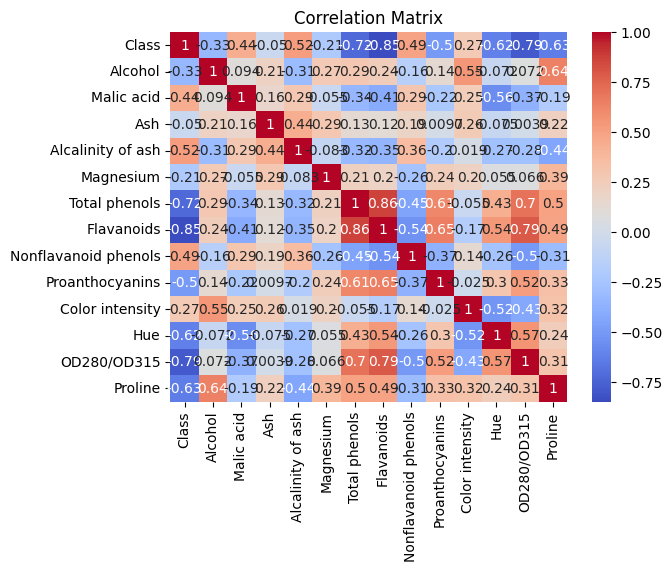

In [ ]:
# Summary statistics
print(wine_data.describe())

# Correlation analysis
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


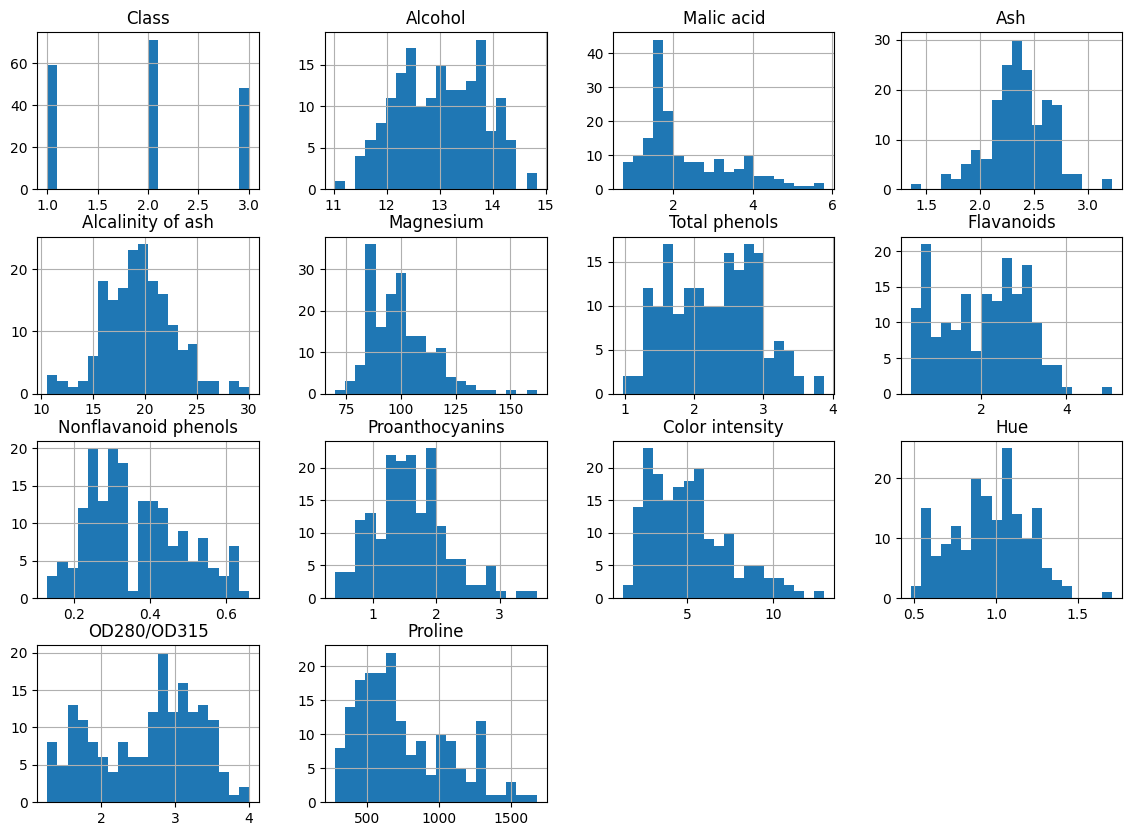

In [ ]:
# Visualization
# Histograms
wine_data.hist(bins=20, figsize=(14, 10))
plt.show()

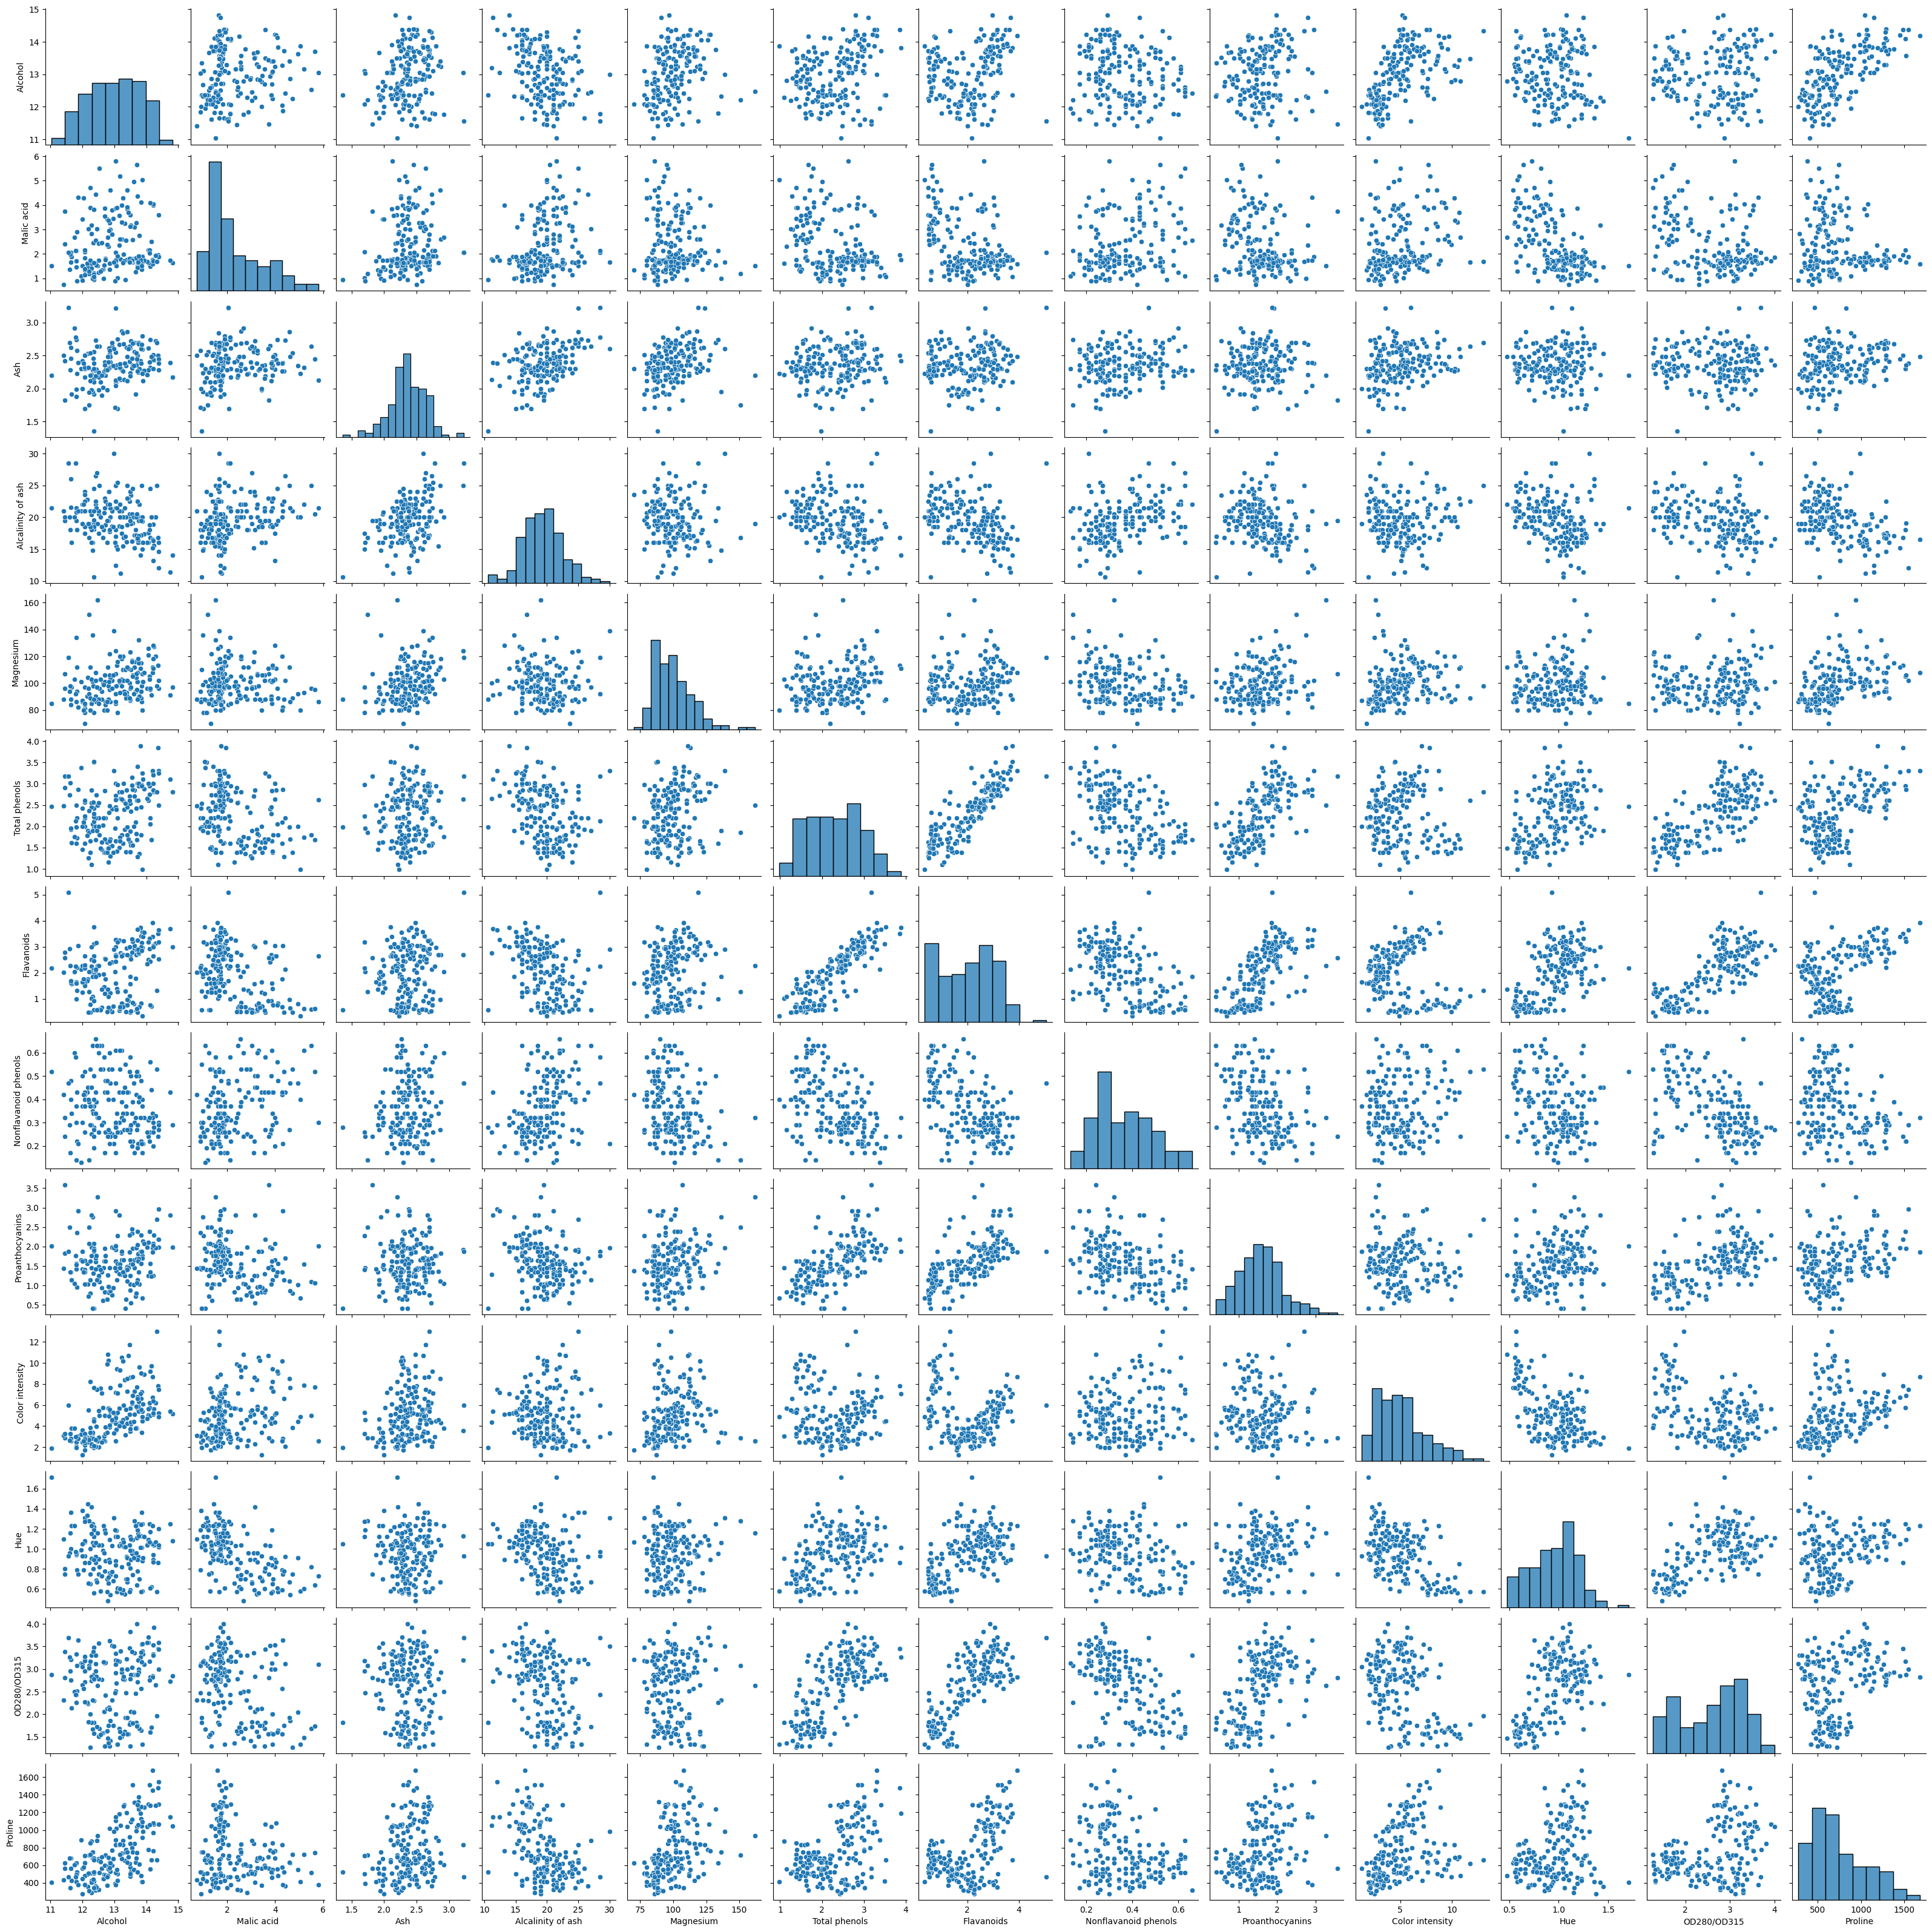

In [ ]:
# Pair plot
sns.pairplot(wine_data.drop('Class', axis=1))
plt.show()

Part c: Hyperparameter Analysis and Selection

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Load the standardized data
X_scaled = np.load('/content/drive/MyDrive/X_scaled.npy')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

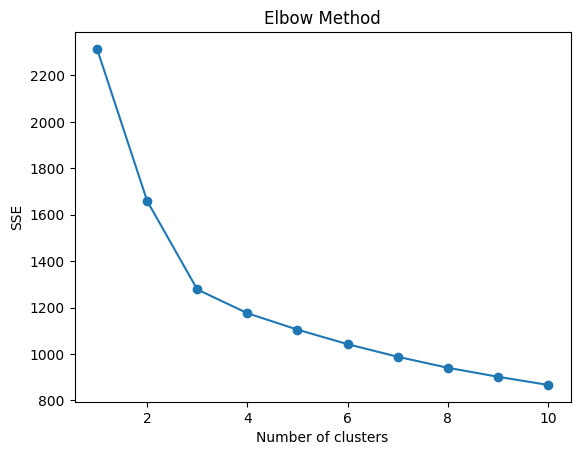

In [ ]:
import matplotlib.pyplot as plt
# Elbow Method for determining the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

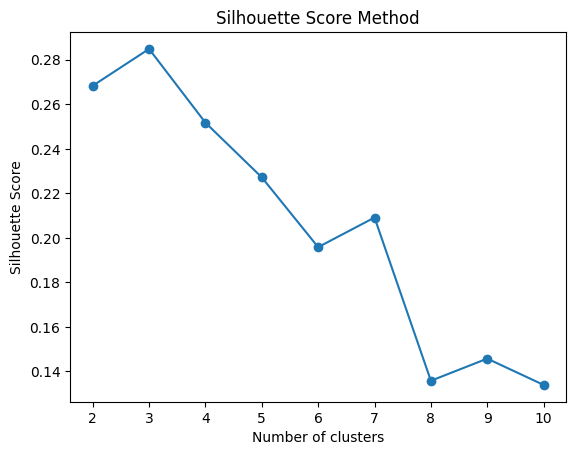

In [ ]:
# Silhouette Score for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()